In [1]:
import sys
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import math

In [2]:
#használható dataset kinyerés kezdete (nyers dataset túl nagy a github-hoz)
filePath="./household_power_consumption.txt"
df=pd.read_csv(filePath, delimiter=";")
print(df.head())

C:\Users\User XI\AppData\Local\Temp\ipykernel_11920\221892141.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(filePath, delimiter=";")


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [3]:
naSum=df.isna().sum()
print(naSum)

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [4]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
print(df.dtypes)

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [5]:
nullRows=df[df.isnull().any(axis=1)]
print(nullRows)

               Date      Time  Global_active_power  Global_reactive_power  \
6839     21/12/2006  11:23:00                  NaN                    NaN   
6840     21/12/2006  11:24:00                  NaN                    NaN   
19724    30/12/2006  10:08:00                  NaN                    NaN   
19725    30/12/2006  10:09:00                  NaN                    NaN   
41832     14/1/2007  18:36:00                  NaN                    NaN   
...             ...       ...                  ...                    ...   
1990185   28/9/2010  19:09:00                  NaN                    NaN   
1990186   28/9/2010  19:10:00                  NaN                    NaN   
1990187   28/9/2010  19:11:00                  NaN                    NaN   
1990188   28/9/2010  19:12:00                  NaN                    NaN   
2027411  24/10/2010  15:35:00                  NaN                    NaN   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
6839 

In [6]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df

C:\Users\User XI\AppData\Local\Temp\ipykernel_11920\936537008.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1


In [7]:
def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])
    
    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0
for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light']      = data['Time'].apply(lambda x: 1.0 if int(x[:2]) >= 6 and int(x[:2]) < 18 
else 0.0)
    data['Time']       = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0)

In [8]:
df.drop(['Date'], axis=1, inplace=True)
df.drop(['DateTime'], axis=1, inplace=True)
df.describe

<bound method NDFrame.describe of              Time  Global_active_power  Global_reactive_power  Voltage  \
0        0.725000                4.216                  0.418   234.84   
1        0.725694                5.360                  0.436   233.63   
2        0.726389                5.374                  0.498   233.29   
3        0.727083                5.388                  0.502   233.74   
4        0.727778                3.666                  0.528   235.68   
...           ...                  ...                    ...      ...   
2075254  0.873611                0.946                  0.000   240.43   
2075255  0.874306                0.944                  0.000   240.00   
2075256  0.875000                0.938                  0.000   239.82   
2075257  0.875694                0.934                  0.000   239.70   
2075258  0.876389                0.932                  0.000   239.55   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \


In [9]:
df = df[df['Minute'] % 10 == 0]
df.dropna(inplace=True)

C:\Users\User XI\AppData\Local\Temp\ipykernel_11920\3210474484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [10]:
nullRows = df[df.isnull().any(axis=1)]
print(nullRows)

Empty DataFrame
Columns: [Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3, Year, Month, Day, Hour, Minute, Is_holiday, Light]
Index: []


In [11]:
df.to_csv('dataset.csv', index=False)
filePath="./dataset.csv"
df=pd.read_csv(filePath)
df
#Használható dataset kinyerésének vége

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light
0,0.729167,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006,12,16,17,30,1.0,1.0
1,0.736111,3.270,0.152,236.73,13.8,0.0,0.0,17.0,2006,12,16,17,40,1.0,1.0
2,0.743056,3.236,0.000,235.84,13.6,0.0,0.0,17.0,2006,12,16,17,50,1.0,1.0
3,0.750000,2.790,0.180,237.52,11.8,0.0,0.0,18.0,2006,12,16,18,0,1.0,0.0
4,0.756944,3.396,0.148,236.20,15.0,0.0,22.0,18.0,2006,12,16,18,10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204924,0.847222,1.082,0.138,240.42,4.6,0.0,1.0,0.0,2010,11,26,20,20,0.0,0.0
204925,0.854167,0.980,0.000,239.43,4.2,0.0,1.0,0.0,2010,11,26,20,30,0.0,0.0
204926,0.861111,0.986,0.102,238.92,4.2,0.0,1.0,0.0,2010,11,26,20,40,0.0,0.0
204927,0.868056,1.198,0.128,238.11,5.0,0.0,1.0,0.0,2010,11,26,20,50,0.0,0.0


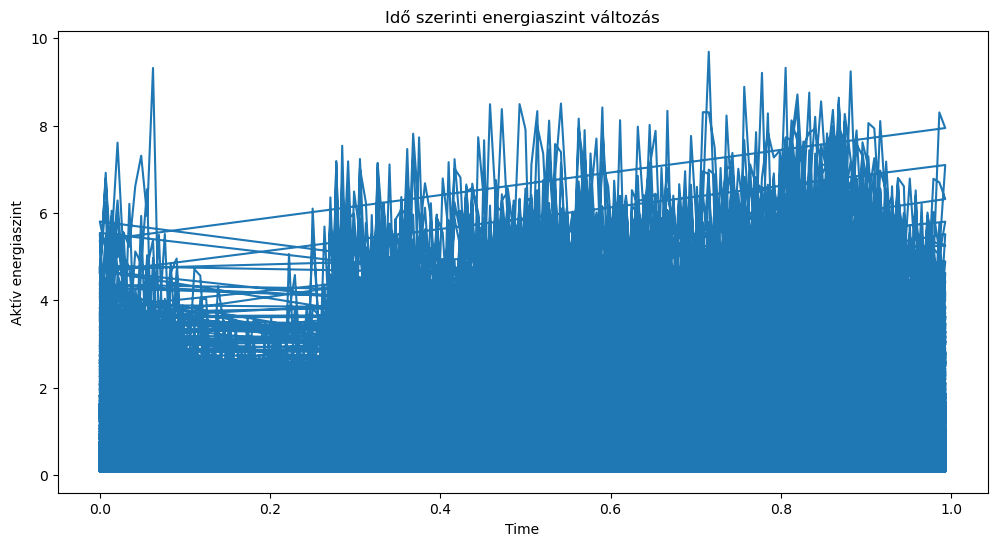

In [12]:
#Adatok grafikon szerinti mutatása
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Aktív energiaszint')
plt.title('Idő szerinti energiaszint változás')
plt.show()

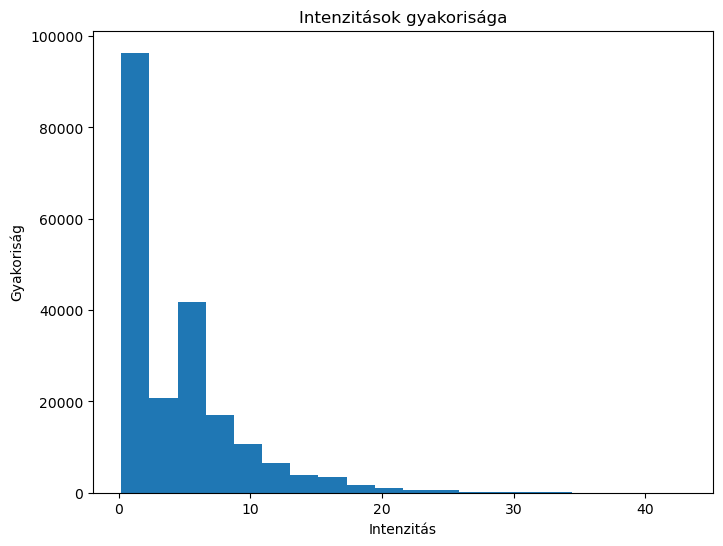

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['Global_intensity'], bins=20)
plt.xlabel('Intenzitás')
plt.ylabel('Gyakoriság')
plt.title('Intenzitások gyakorisága')
plt.show()

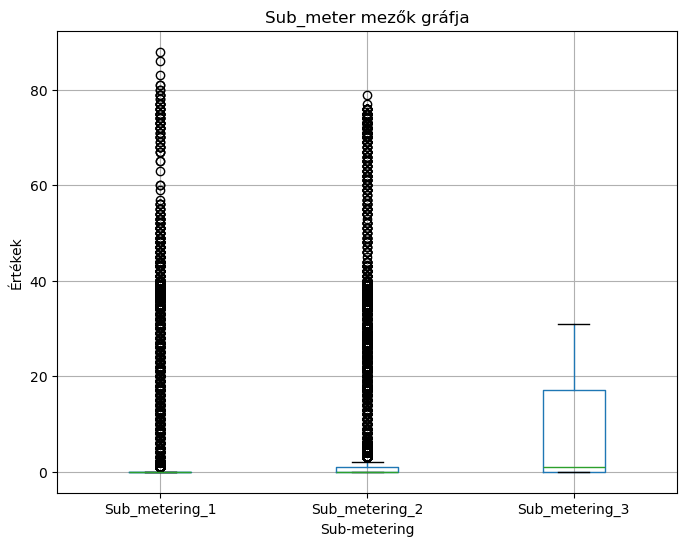

In [14]:
sub_metering_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
plt.figure(figsize=(8, 6))
df[sub_metering_cols].boxplot()
plt.xlabel('Sub-metering')
plt.ylabel('Értékek')
plt.title('Sub_meter mezők gráfja')
plt.show()

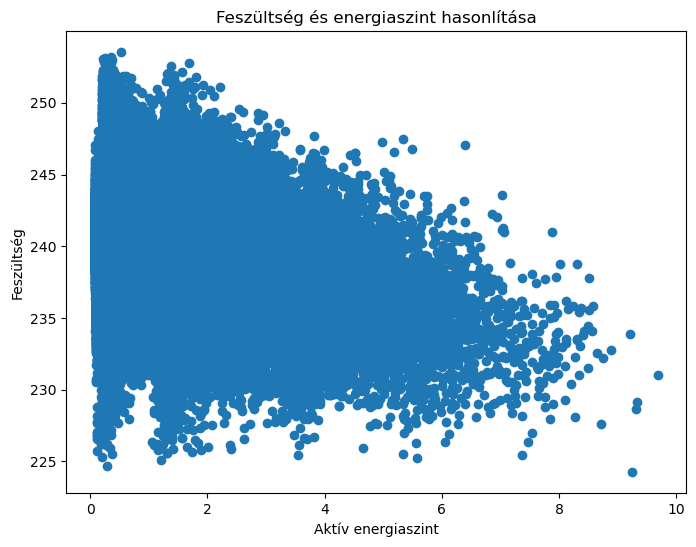

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Global_active_power'], df['Voltage'])
plt.xlabel('Aktív energiaszint')
plt.ylabel('Feszültség')
plt.title('Feszültség és energiaszint hasonlítása')
plt.show()

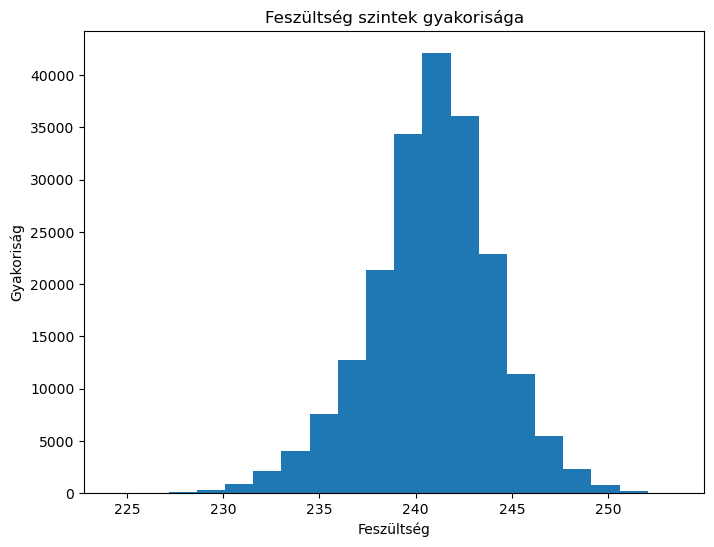

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['Voltage'], bins=20)
plt.xlabel('Feszültség')
plt.ylabel('Gyakoriság')
plt.title('Feszültség szintek gyakorisága')
plt.show()

<Figure size 800x600 with 0 Axes>

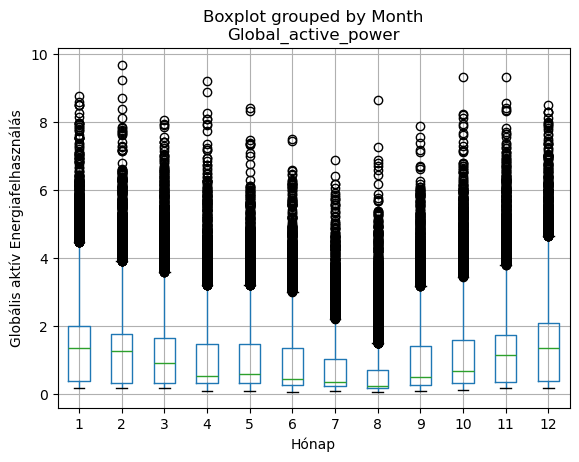

In [17]:

plt.figure(figsize=(8, 6))
df.boxplot(column='Global_active_power', by='Month')
plt.xlabel('Hónap')
plt.ylabel('Globális aktív Energiafelhasználás')
plt.show()


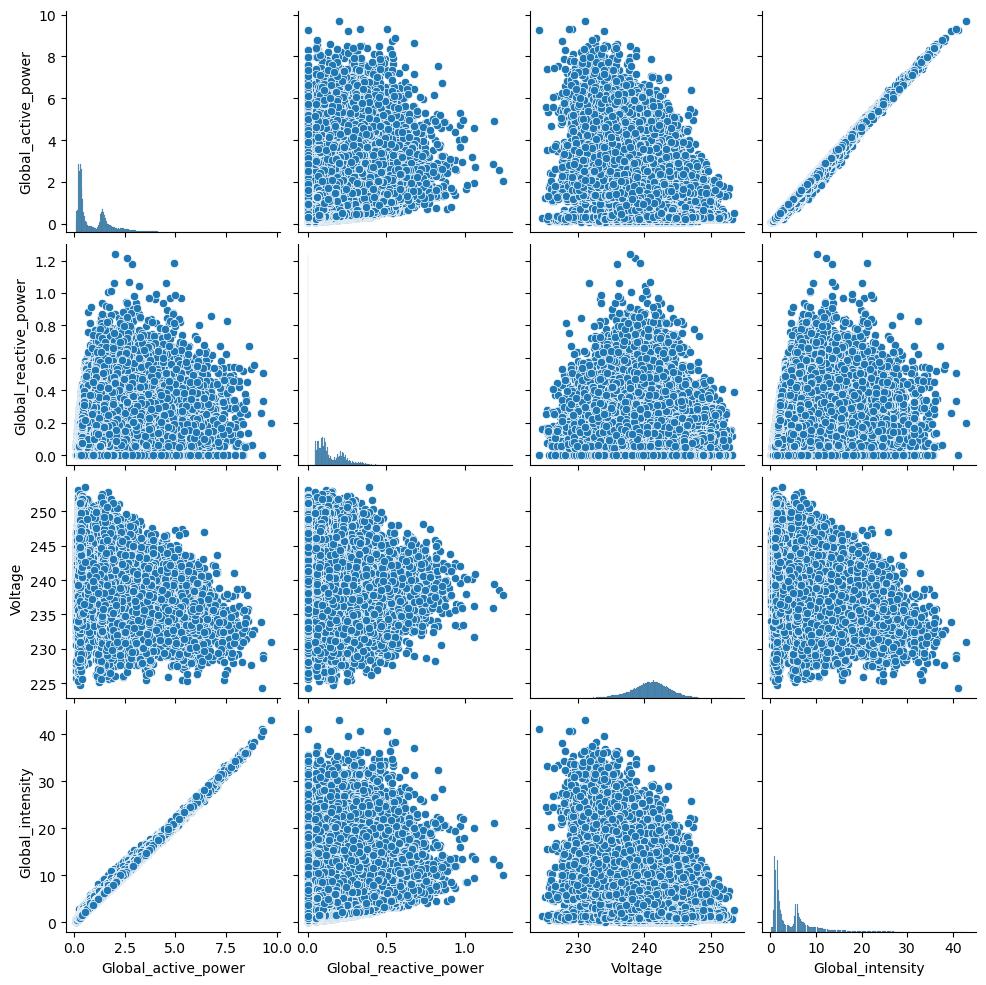

In [18]:
#Adatok közötti összefüggés megjelenítése scatter plot matrix-szal
variables = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
sns.pairplot(df[variables])
plt.show()

In [19]:
#ML model
X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Time,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light
85695,0.562500,0.000,238.71,0.6,0.0,0.0,1.0,2008,8,5,13,30,0.0,1.0
93458,0.472222,0.104,239.60,1.4,0.0,0.0,1.0,2008,9,28,11,20,1.0,1.0
118218,0.548611,0.156,240.95,5.8,0.0,1.0,17.0,2009,3,19,13,10,0.0,1.0
8809,0.902778,0.046,235.99,12.6,0.0,0.0,17.0,2007,2,15,21,40,0.0,0.0
36563,0.354167,0.090,237.24,5.4,1.0,0.0,17.0,2007,8,30,8,30,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.083333,0.102,243.04,1.6,0.0,0.0,0.0,2009,3,31,2,0,0.0,0.0
103694,0.590278,0.000,245.68,5.6,0.0,0.0,19.0,2008,12,8,14,10,0.0,1.0
131932,0.090278,0.092,242.63,1.0,0.0,1.0,1.0,2009,6,25,2,10,0.0,0.0
146867,0.437500,0.110,238.84,8.6,0.0,0.0,29.0,2009,10,7,10,30,0.0,1.0


In [20]:
#Predikciók regresszió segítségével
#Lineáris regresszió
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse

0.04021946870318641

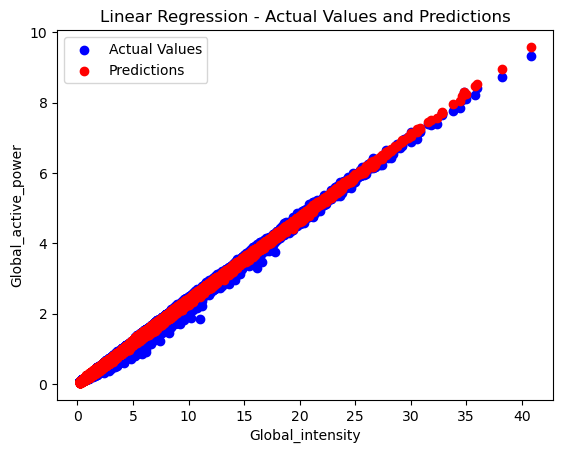

In [21]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['Global_intensity'], linear_reg_predictions, color='red', label='Predictions')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('Linear Regression - Actual Values and Predictions')
plt.legend()
plt.show()

In [22]:
#Decision tree regresszió
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
decision_tree_reg_predictions = decision_tree_reg.predict(X_test)
decision_tree_reg_rmse = np.sqrt(mean_squared_error(y_test, decision_tree_reg_predictions))
decision_tree_reg_rmse

0.046048354837741785

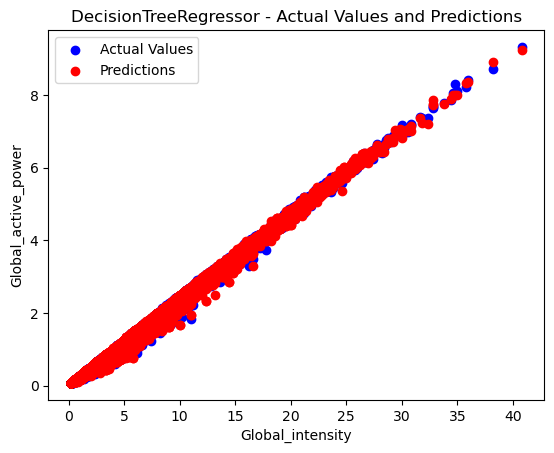

In [23]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['Global_intensity'], decision_tree_reg_predictions, color='red', label='Predictions')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('DecisionTreeRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

In [24]:
#Random forest regresszió
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
random_forest_reg_predictions = random_forest_reg.predict(X_test)
random_forest_reg_rmse = np.sqrt(mean_squared_error(y_test, random_forest_reg_predictions))
random_forest_reg_rmse

0.03186263134582116

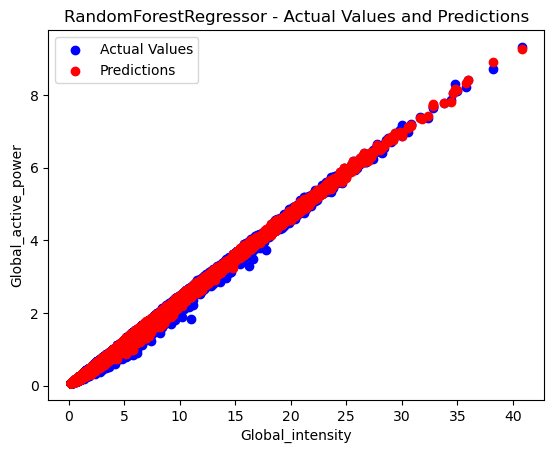

In [25]:
plt.scatter(X_test['Global_intensity'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['Global_intensity'], random_forest_reg_predictions, color='red', label='Predictions')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('RandomForestRegressor - Actual Values and Predictions')
plt.legend()
plt.show()

d:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index 

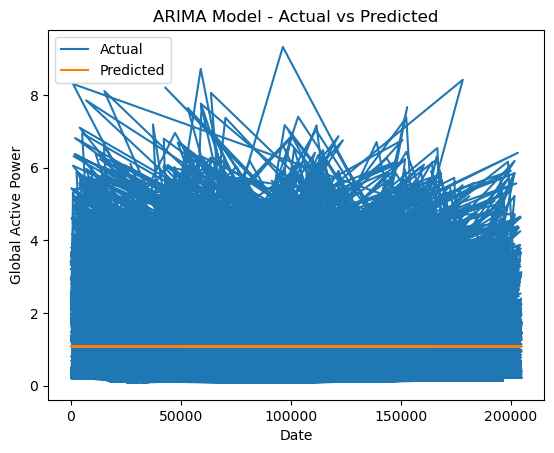

In [26]:
#Predikció ARIMA model használatával
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# ARIMA model készítése
model = ARIMA(y_train, order=(1, 1, 1))
model_fit = model.fit()

# Predikció
predictions = model_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, typ='levels')

# Predikció megjelenítése
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('ARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()

In [30]:
#A végső előrejelzés prophet-tel történik
!python -m pip install prophet
from prophet import Prophet

In [28]:
data = df.copy()
data['ds'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
data = data.rename(columns={'Global_active_power': 'y'})

20:57:10 - cmdstanpy - INFO - Chain [1] start processing
20:59:33 - cmdstanpy - INFO - Chain [1] done processing


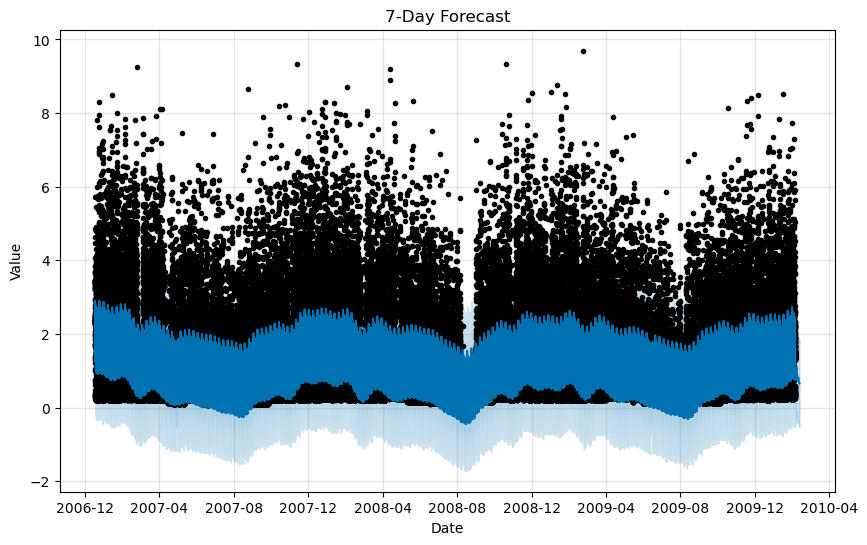

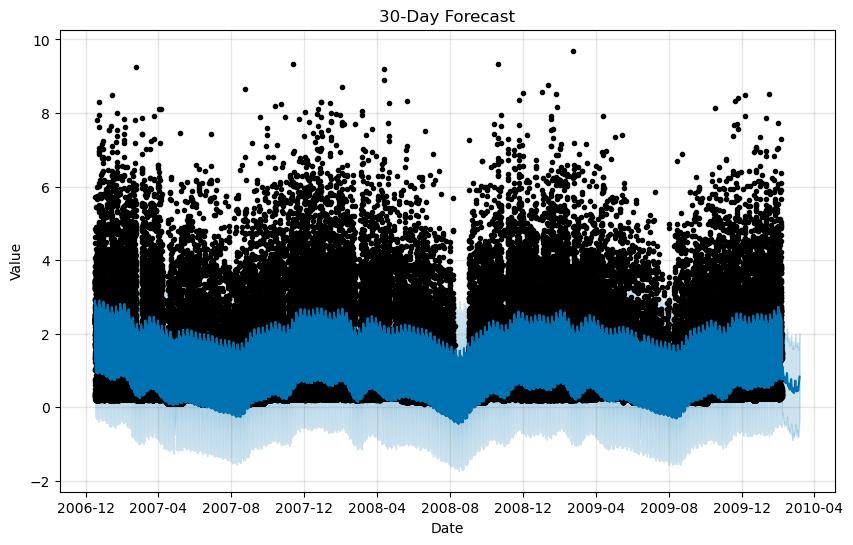

In [31]:
data_copy = data.copy()
train_size = int(len(data_copy) * 0.8)  # Adatok csak 80%-val történik a training
train_df = data_copy[:train_size]
forecast_df = data_copy[train_size:]

model = Prophet()
model.fit(train_df)

# Előrejelzés 7 és 30 napra
future_dates_7days = model.make_future_dataframe(periods=7, freq='D')
future_dates_30days = model.make_future_dataframe(periods=30, freq='D')
predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

# Megjelenítés grafikonon
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()